Klasik Pizza ile Zeytin sosu
11
Pizza Seçiminiz:
1: Klasik Pizza ($10)
2: Margarita Pizza ($12)
3: Türk Pizza ($15)
4: Sade Pizza ($8)
Ve Sos Seçiminiz:
11: Zeytin ($1)
12: Mantarlar ($1)
13: Keçi Peyniri ($2)
14: Et ($3)
15: Soğan ($1)
16: Mısır ($1)
* Teşekkür ederiz!
Siparişiniz:
Sade Pizza ile Soğan sosu
Toplam Tutar: $9
Şifre doğrulandı.
Siparişiniz Alındı!


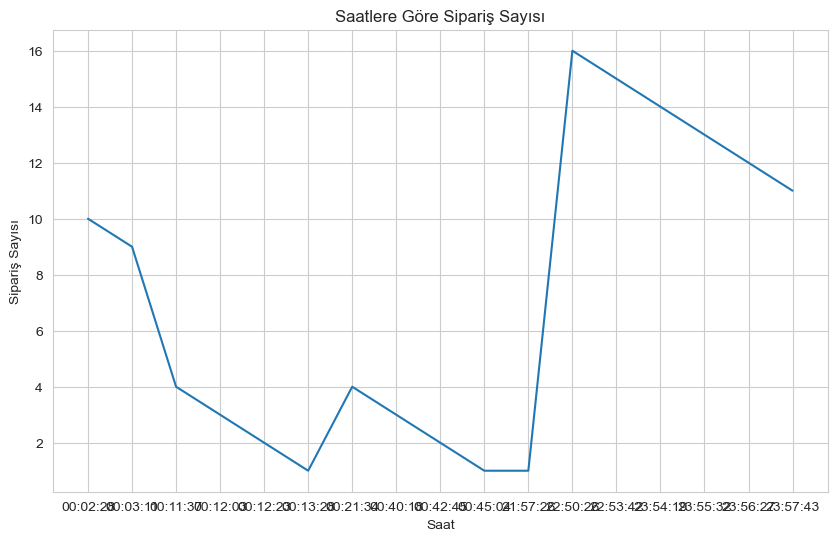

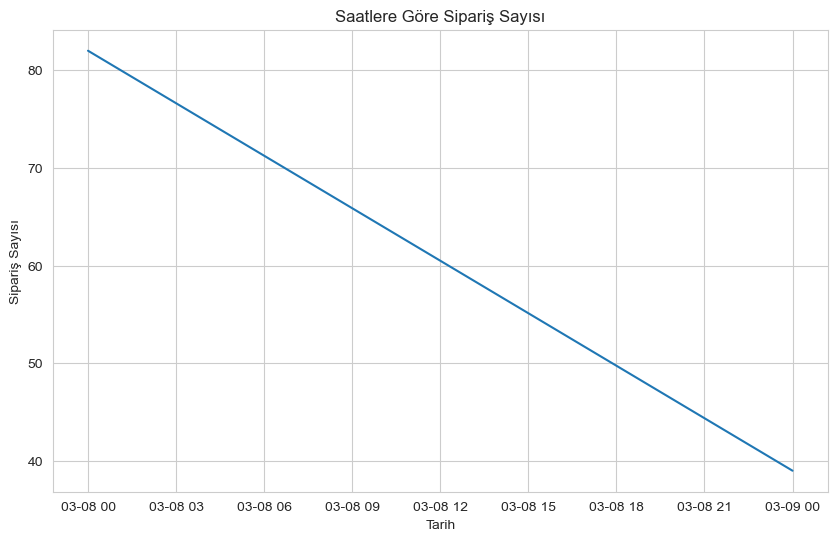

In [3]:
import csv
from datetime import datetime
import csv
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menü listemizin içindeki öğeleri dict. formatında yazalım.
menu_items = [
    {'id': 1, 'name': 'Klasik Pizza', 'price': 10},
    {'id': 2, 'name': 'Margarita Pizza', 'price': 12},
    {'id': 3, 'name': 'Türk Pizza', 'price': 15},
    {'id': 4, 'name': 'Sade Pizza', 'price': 8},
    {'id': 11, 'name': 'Zeytin', 'price': 1},
    {'id': 12, 'name': 'Mantarlar', 'price': 1},
    {'id': 13, 'name': 'Keçi Peyniri', 'price': 2},
    {'id': 14, 'name': 'Et', 'price': 3},
    {'id': 15, 'name': 'Soğan', 'price': 1},
    {'id': 16, 'name': 'Mısır', 'price': 1},
]

with open('Menu.txt', 'w', encoding='utf-8') as menu_file:
    menu_file.write('* Global Pizzaya hoşgeldiniz!\n\n')
    menu_file.write('* Lütfen Bir Pizza Tabanı Seçiniz:\n')
    for item in menu_items[:4]:
        menu_file.write(f"{item['id']}: {item['name']} - ${item['price']}\n")
    menu_file.write('\n* Ve Seçeceğiniz Sos:\n')
    for item in menu_items[4:]:
        menu_file.write(f"{item['id']}: {item['name']} - ${item['price']}\n")
    menu_file.write('Teşekkür ederiz!\n')
    """
     _summary_
    Menu.txt Adında İçinde Pizza ve Sosların Olduğu Menümüzü Oluşturduk
    Listedeki ilk dört öğe pizza türleri, geri kalan öğeler ise sos seçenekleridir.
    -------
    """
class Pizza(): #Bu kod ile ana sınıfımızı tanımladık.
    BASE_PRICES = {'Klasik Pizza': 10, 'Margarita Pizza': 12, 'Türk Pizza': 15, 'Sade Pizza': 8}
    SAUCE_PRICES = {'Zeytin': 1, 'Mantarlar': 1, 'Keçi Peyniri': 2, 'Et': 3, 'Soğan': 1, 'Mısır': 1}
    """
    Pizza _summary_
    Sınıfın BASE_PRICES ve SAUCE_PRICES olmak üzere iki değişkeni vardır;
    bunlar, ilgili fiyatlarıyla eşleyen sözlüklerin olduğu değişkenlerdir.
    -------
    """
    def __init__(self, pizza_type, sauce_type): #constructor
        self.pizza_type = pizza_type
        self.sauce_type = sauce_type
        self.price = self.BASE_PRICES[pizza_type] + self.SAUCE_PRICES[sauce_type]
        """
        __init__ _summary_
        Toplam Tutar hesaplama

        _extended_summary_
        Pizza_type ve sauce_type özniteliklerini iletilen bağımsız değişkenlere atar ve ardından sırasıyla
        BASE_PRICES ve SAUCE_PRICES sözlüklerinde pizza fiyat ve sos fiyatlarını birbirine ekleyerek pizzanın fiyatını hesaplar.

        Parameters
        ----------
        pizza_type : str
        Pizza tabanının türü.
        sauce_type : str
        Pizza sosunun türü.
        """
    def get_description(self):
        return f"{self.pizza_type} ile {self.sauce_type} sosu"
    """
        get_description _summary_
        get_description yöntemi, pizza_type ve sauce_type öğelerini birleştirerek 
        çıktıda yazdıracağımız pizzayı tanımlayan bir dize döndürüyor.

        Returns
        -------
        _type_ : str
        Pizza'nın açıklamasını döndürür.
    """
    def get_cost(self):
        return self.price
    """
        get_cost _summary_
        Pizza fiyatını döndürmek için fonksiyon
        Returns
        -------
        _type_ : int
        Pizza'nın toplam maliyeti.
    """
    
class ClassicPizza(Pizza):
    def __init__(self, sauce_type):
        super().__init__('Klasik Pizza', sauce_type)
        self.name = 'Klasik Pizza'

class MargheritaPizza(Pizza):
    def __init__(self, sauce_type):
        super().__init__('Margarita Pizza', sauce_type)
        self.name = 'Margarita Pizza'

class TurkPizza(Pizza):
    def __init__(self, sauce_type):
        super().__init__('Türk Pizza', sauce_type)
        self.name = 'Türk Pizza'

class PlainPizza(Pizza):
    def __init__(self, sauce_type):
        super().__init__('Sade Pizza', sauce_type)
        self.name = 'Sade Pizza'
    """
        __init__ _summary_
        subclass ın üst sınıfından bir yöntem çağırmasına izin veren super() işlevi kullanıyoruz.
        super() işlevi ile Child sınıfı, Parent sınıfından kalıtım yoluyla aynı isimli öğeye erişmemize mümkün kılıyor.
        -------
    """
class PizzaDecorator():
    def __init__(self, pizza):
        self.pizza = pizza

    def get_description(self):
        return self.pizza.get_description()

    def get_cost(self):
        return self.pizza.get_cost()

p = Pizza('Klasik Pizza', 'Zeytin')
decorated_p = PizzaDecorator(p)

print(decorated_p.get_description()) # Klasik Pizza ile Zeytin sosu
print(decorated_p.get_cost()) # 11
"""
    PizzaDecorator() _summary_

    Bu kod, bir pizza örneğini (p) alan ve onu dekore eden bir pizza dekoratörü 
    sınıfını (PizzaDecorator) tanımlar. Bu sınıf, dekore edilmiş pizza nesnesinin 
    tanımını ve maliyetini almak için orijinal pizza nesnesinin get_description () ve get_cost () yöntemlerini çağırır.
    -------
"""
class ZeytinSosu:
    def __init__(self):
        self.ad = 'Zeytin'
        self.fiyat = 1

class MantarSosu:
    def __init__(self):
        self.ad = 'Mantarlar'
        self.fiyat = 1

class KeciPeyniriSosu:
    def __init__(self):
        self.ad = 'Keçi Peyniri'
        self.fiyat = 2

class EtSosu:
    def __init__(self):
        self.ad = 'Et'
        self.fiyat = 3

class SoganSosu:
    def __init__(self):
        self.ad = 'Soğan'
        self.fiyat = 1

class MisirSosu:
    def __init__(self):
        self.ad = 'Mısır'
        self.fiyat = 1
Zeytin_sosu = ZeytinSosu()
Mantar_sosu = MantarSosu()
KeciPeyniri_sosu = KeciPeyniriSosu()
Et_sosu = EtSosu()
Sogan_sosu = SoganSosu()
Misir_sosu = MisirSosu()
# sosların özellikleri belirlenmiş ve özellikleri kullanılarak nesneler oluşturulmuştur.

class Order():
    ORDERS_FILE = 'orders.csv'

    def __init__(self): # constructor
        self.pizzas = []
        self.total_price = 0

    def add_pizza(self, pizza):
        self.pizzas.append(pizza)
        self.total_price += pizza.get_cost()
    # add_pizza metodu ile, üstte tanımladığımız pizza değişkenine seçilen yeni bir pizzayı ekliyoruz.
    # takiben get_cost() fonksiyonunda return ettiğimiz seçilen ürün fiyatlarını toplayarak total_price a atıyoruz.
    def remove_pizza(self, pizza):
        self.pizzas.remove(pizza)
        self.total_price -= pizza.get_cost()

    def place_order(self, credit_card_number, password):
        user_info = self.get_user_info()
        now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        pizza_name = [pizza.name for pizza in self.pizzas]
        with open(self.ORDERS_FILE, 'a', encoding='utf-8') as f:
            fieldnames = ["NAME", "SURNAME", "TC NO", "HESAP", "KART NUMARASI", "KART SIFRESI", "ZAMAN", "SIPARIS"]
            writer = csv.DictWriter(f, fieldnames=fieldnames)
            #tell() fonksiyonu, dosya imlecinin konumunu döndürür. Yani, dosyada imlecin hangi konumda olduğunu gösterir.
            if f.tell() == 0:  # Dosyanın boş olduğu durumda başlık yazıyor.
                writer.writeheader()
            writer.writerow({
                "NAME": user_info['name'],
                "SURNAME": user_info['surname'],
                "TC NO": user_info['id'],
                "HESAP": self.total_price,
                "KART NUMARASI": credit_card_number,
                "KART SIFRESI": password,
                "ZAMAN": now,
                "SIPARIS": pizza_name                
            })
            
        self.pizzas = []
        self.total_price = 0
        print("Siparişiniz Alındı!")
    """
        Order _summary_
        Müşteri siparişini pizza listesi ve toplam fiyatı ve kullanıcı bilgilerini
        yazdırmak için oluşturuldu. 

        Attributes
        -----------
        ORDERS_FILE : str
        Sipariş bilgilerinin saklandığı dosya
        pizzas : list
        Sipariş için seçilen pizzaları içeren liste.
        total_price : int
        Seçilen Pizzanın maliyeti

        Methods
        --------
        - add_pizza(pizza)
        Siparişe yeni bir pizza ekler ve toplam fiyatı buna göre günceller.

        - remove_pizza(pizza)
        Bir pizzayı siparişten kaldırır ve toplam fiyatı buna göre günceller.

        - place_order(credit_card_number, password)
        CSV dosyasına verilen bilgileri yazdırır. Fakat ilk Satır sabit
        kolon başlıkları belirtildiği gibidir.Ayrıca sonraki siparişte
        karışıklık çıkmaması için pizza listesini ve toplam fiyatı sıfırlar ve siparişin verildiğini ekrana yazdırır.
    """
    def display_order(self):
        print("Siparişiniz:")
        for pizza in self.pizzas:
            print(pizza.get_description())
        print(f"Toplam Tutar: ${self.total_price}")
    # display_order metodu, siparişin özetini ve toplam hesaplanan toplam ücreti(total_price) ekrana yazdırır.

    # Kimlik Bilgilerini alıyoruz.
    def get_user_info(self):
        name = input("Lütfen Adınızı giriniz: ")
        name = name.upper()
        surname = input("Lütfen Soyadınızı giriniz: ")
        surname = surname.upper()
        id_number = input("Lütfen TC kimlik numaranızı giriniz: ")
        return {'name': name, 'surname': surname, 'id': id_number}

def display_menu():
    print("Pizza Seçiminiz:")
    for i, base in enumerate(Pizza.BASE_PRICES):
        print(f"{i+1}: {base} (${Pizza.BASE_PRICES[base]})")
    print("Ve Sos Seçiminiz:")
    for i, sauce in enumerate(Pizza.SAUCE_PRICES):
        print(f"{i+11}: {sauce} (${Pizza.SAUCE_PRICES[sauce]})")
    print("* Teşekkür ederiz!")
# display_menu() fonksiyonu ile menu.txt içine yazdırdığımız öğeleri ekrana yazdırmamızı
# sağlayan fonksiyonu yazmış oluyoruz.
class PasswordValidator:
    def __init__(self, password):
        self.password = password

    def validate(self):
        if len(self.password) != 4:
            return False
        if not self.password.isdigit():
            return False
        return True

def add_orders_to_database(db_name, csv_file):
    # Veritabanı bağlantısı oluştur
    conn = sqlite3.connect(db_name)

    # Tablo oluştur
    conn.execute('''CREATE TABLE IF NOT EXISTS customers
                 (ID INTEGER PRIMARY KEY AUTOINCREMENT,
                 NAME TEXT NOT NULL,
                 SURNAME TEXT NOT NULL,
                 TC TEXT NOT NULL,
                 HESAP TEXT NOT NULL,
                 KART_NUMARASI TEXT NOT NULL,
                 KART_SIFRESI TEXT NOT NULL,
                 ZAMAN TEXT NOT NULL,
                 SIPARIS TEXT NOT NULL);''')

    # CSV dosyasını aç
    with open(csv_file, 'r') as csvfile:
        # CSV verilerini oku
        reader = csv.DictReader(csvfile, delimiter=',')

        # Her satır için veritabanına ekle
        for row in reader:
            # Verileri veritabanına ekle
            conn.execute('''INSERT INTO customers (NAME, SURNAME, TC, HESAP, KART_NUMARASI, KART_SIFRESI, ZAMAN, SIPARIS)
                         VALUES (?, ?, ?, ?, ?, ?, ?, ?)''',
                         (row['NAME'], row['SURNAME'], row['TC NO'], row['HESAP'], row['KART NUMARASI'], row['KART SIFRESI'], row['ZAMAN'], row['SIPARIS']))
    # Commit changes and close connection
    conn.commit()
    conn.close()

def siparis_saatlerine_gore_grafik(db_file):
    db_file = "musteri.db"
    # Veritabanı bağlantısı oluştur
    conn = sqlite3.connect(db_file)

    # Verileri al ve DataFrame'e aktar
    df = pd.read_sql_query("SELECT * from customers", conn)
    df['Tarih'] = pd.to_datetime(df['ZAMAN']).dt.date
    df['Tarih'] = pd.to_datetime(df['Tarih'], format='%Y-%m-%d')
    df['ZAMAN'] = pd.to_datetime(df['ZAMAN'])
    df['Saat'] = df['ZAMAN'].dt.strftime('%H:%M:%S')

    # Saatlere göre sipariş sayısını hesapla
    order_count = df.groupby('Saat').size().reset_index(name='Siparis Sayisi')
    # Çizgi grafiği oluştur
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Saat', y='Siparis Sayisi', data=order_count)
    plt.title('Saatlere Göre Sipariş Sayısı')
    plt.xlabel('Saat')
    plt.ylabel('Sipariş Sayısı')
    plt.show()
    # Tarihlere göre sipariş sayısını hesapla
    order_count = df.groupby('Tarih').size().reset_index(name='Siparis Sayisi')
    # Çizgi grafiği oluştur
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Tarih', y='Siparis Sayisi', data=order_count)
    plt.title('Saatlere Göre Sipariş Sayısı')
    plt.xlabel('Tarih')
    plt.ylabel('Sipariş Sayısı')
    plt.show()

def main():
    order = Order() # üstte tanımladığımız order sınıfı
    while True:
        display_menu()
        pizza_type = input("Lütfen Pizza Tabanını Seçiniz (1-4): ")
        sauce_type = input("Lütfen Sos Seçiminizi Yapınız (11-16): ")
    # Kullanıcı, bir pizza ve sos seçimini yapar.
        if pizza_type == '1':
            pizza = ClassicPizza(list(Pizza.SAUCE_PRICES.keys())[int(sauce_type)-11]) # -11 => sauce_type içindeki indeks bilgisi için
        elif pizza_type == '2':
            pizza = MargheritaPizza(list(Pizza.SAUCE_PRICES.keys())[int(sauce_type)-11])
        elif pizza_type == '3':
            pizza = TurkPizza(list(Pizza.SAUCE_PRICES.keys())[int(sauce_type)-11])
        elif pizza_type == '4':
            pizza = PlainPizza(list(Pizza.SAUCE_PRICES.keys())[int(sauce_type)-11])
        else:
            print("Geçersiz Pizza ve/veya Sos Seçimi Yaptınız. Lütfen Tekrar Seçim Yapınız.")
            continue
        order.add_pizza(pizza)
        # Pizza siparişi Order nesnesine eklenir ve siparişin toplamı her zaman güncellenir.
        order.display_order()
        confirm = input("Başka Pizza İstermisiniz? (y/n): ")
        if confirm.lower() == 'n':
            break
        # Kullanıcı daha fazla pizza eklemek isteyip istemediği sorulur ve "n" yanıtı verilene kadar bu işlem tekrarlanır.
    credit_card_number = input("Lütfen Kredi Kartı Numaranızı Giriniz: ")
    while True:
        password = input("Lütfen Kredi Kartı Şifrenizi Giriniz (4 haneli): ")
        #password = input("Lütfen Kredi Kartı Şifrenizi Giriniz: ")
        validator = PasswordValidator(password)
        if not validator.validate():
            print("Hatalı şifre girişi! Lütfen tekrar deneyin.")
        else:
            print("Şifre doğrulandı.")
            break
    order.place_order(credit_card_number, password)
    add_orders_to_database("musteri.db", "orders.csv")
    siparis_saatlerine_gore_grafik("musteri.db")
if __name__ == '__main__':
    main()